<a href="https://colab.research.google.com/github/yeonmi02/machine-learning-practice/blob/main/250513_Dimension_Reduction_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 예제 1 : MNIST 데이터셋(손글씨 이미지) 2차원으로 축소
- 이미지 데이터는 8x8 64차원 데이터
- 해당 고차원 데이터를 2차원으로 축소하여 시각화

### 라이브러리 import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

### 데이터 불러오기

In [2]:
digits = load_digits()
X = digits.data  # 8x8 이미지 픽셀값
y = digits.target  # 0~9

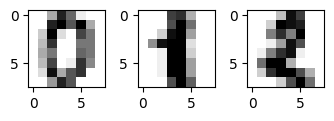

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(4, 1))
axs[0].imshow(X[0].reshape(8,8), cmap='gray_r')
axs[1].imshow(X[1].reshape(8,8), cmap='gray_r')
axs[2].imshow(X[2].reshape(8,8), cmap='gray_r')
plt.show()

In [4]:
print(f"X 크기 : {X.shape}, y 크기 : {y.shape}")

X 크기 : (1797, 64), y 크기 : (1797,)


### PCA를 사용하여 2차원으로 차원 축소

In [5]:
pca = PCA(n_components=2)  # 주성분 2개로 축소
X_pca = pca.fit_transform(X)

In [6]:
X_pca

array([[ -1.25946645, -21.27488348],
       [  7.9576113 ,  20.76869896],
       [  6.99192297,   9.95598641],
       ...,
       [ 10.8012837 ,   6.96025223],
       [ -4.87210009, -12.42395362],
       [ -0.34438963,  -6.36554919]])

### 시각화

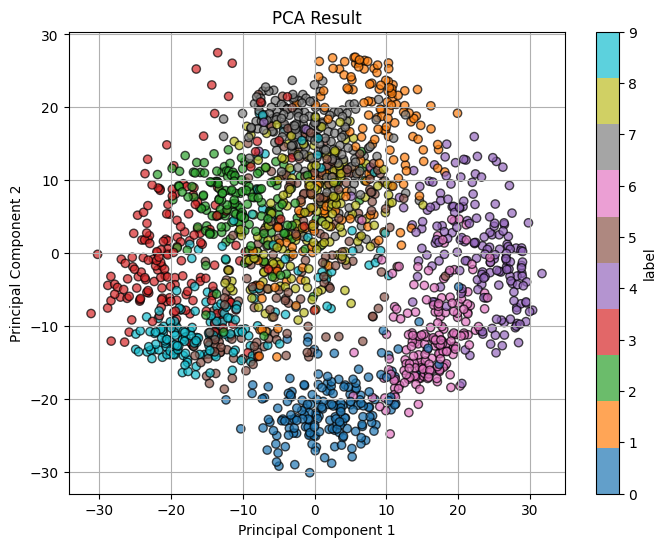

In [7]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='label')
plt.title("PCA Result")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# 예제 2 : PCA와 지도학습을 통한 붓꽃 분류

### 라이브러리 import

In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 데이터 불러오기

In [9]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
X_train.shape

(120, 4)

### PCA 적용 안한 Logistic Regression

In [11]:
model_original = LogisticRegression(max_iter=200, random_state=42)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

### PCA 적용한 Logistic Regression

In [12]:
pca = PCA(n_components=2)  # 2차원으로 축소
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
X_train_pca[0:10,:]

array([[-2.90333682, -0.54299974],
       [ 0.49786421, -1.15857037],
       [ 1.3229089 ,  0.22065375],
       [-2.68548399, -0.08921653],
       [ 0.1487804 , -0.67542806],
       [ 1.51224903, -0.38929739],
       [ 0.34045327, -0.49299039],
       [ 1.43083723, -0.1449451 ],
       [ 3.07056835,  0.64972748],
       [ 3.48330265,  1.17227273]])

In [14]:
X_train_pca.shape

(120, 2)

In [15]:
model_pca = LogisticRegression(max_iter=200, random_state=42)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

### 결과 비교

In [16]:
print(f"PCA 적용 안한 지도학습 정확도 : {accuracy_original:.4f}")
print(f"PCA 적용한 지도학습 정확도 : {accuracy_pca:.4f}")

PCA 적용 안한 지도학습 정확도 : 0.9667
PCA 적용한 지도학습 정확도 : 0.9000
